In [43]:
import pandas as pd
wine=pd.read_csv(r"C:\Users\ANONYMOUS\Documents\MACHINE\winequality-white.csv", delimiter=";")
print(wine)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  

In [44]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [45]:
Y=wine["quality"]

In [46]:
X=wine.drop(["quality"], axis=1)

In [47]:
import matplotlib.pyplot as plt
import seaborn as sb

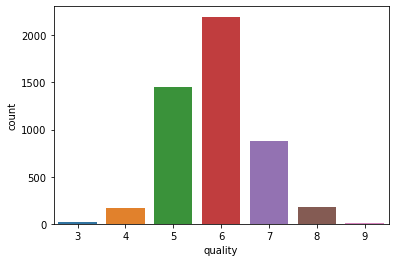

In [48]:
sb.countplot(x=wine["quality"], data=wine)

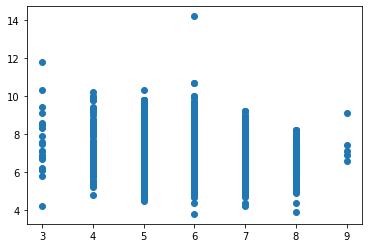

In [49]:
plt.scatter(wine["quality"], wine["fixed acidity"])

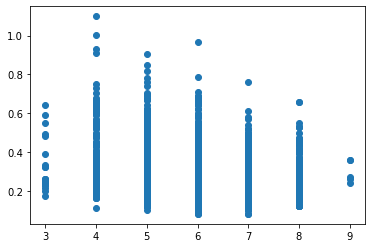

In [50]:
plt.scatter(wine["quality"], wine["volatile acidity"])

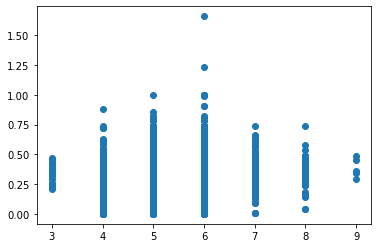

In [51]:
plt.scatter(wine["quality"], wine["citric acid"])

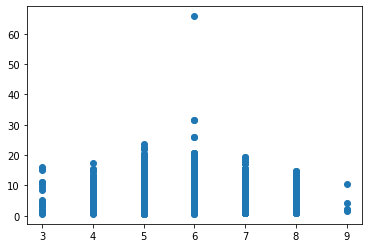

In [52]:
plt.scatter(wine["quality"], wine["residual sugar"])

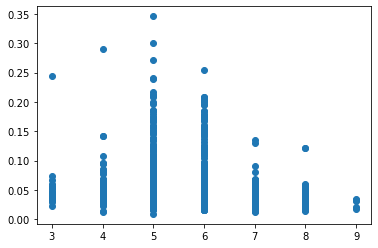

In [53]:
plt.scatter(wine["quality"], wine["chlorides"])

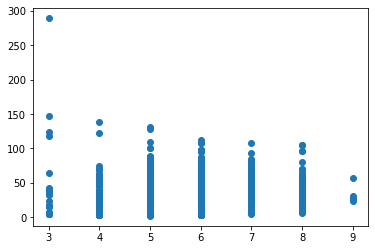

In [54]:
plt.scatter(wine["quality"], wine["free sulfur dioxide"])

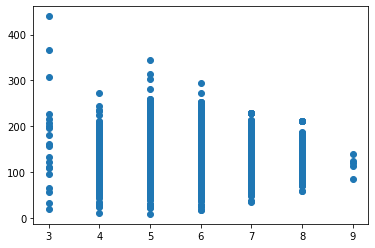

In [55]:
plt.scatter(wine["quality"], wine["total sulfur dioxide"])

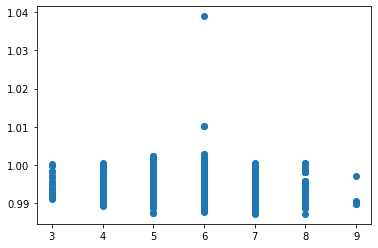

In [56]:
plt.scatter(wine["quality"], wine["density"])

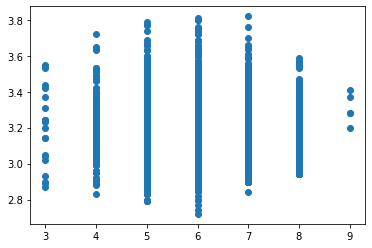

In [57]:
plt.scatter(wine["quality"], wine["pH"])

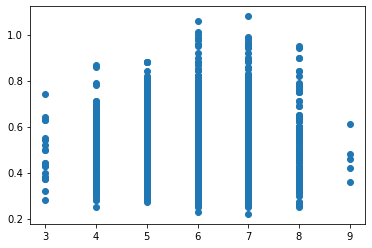

In [58]:
plt.scatter(wine["quality"], wine["sulphates"])

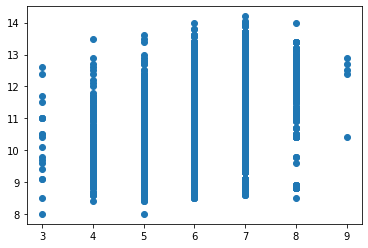

In [59]:
plt.scatter(wine["quality"], wine["alcohol"])

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X,Y, test_size=0.3)
linear=LinearRegression()
linear.fit(x_train, y_train)

LinearRegression()

In [61]:
linear.score(x_test, y_test)

0.27331823666952915